In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from functools import partial
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [9]:
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

timespan_ab = {
    "short_term": []
    ,"medium_term": [30]
    ,"long_term": []
}

trial = FinCapstone(ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","TSRE","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "DIS", "NFLX", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], ticker_list_samplesize=4, timespan=timespan, timespan_ab=timespan_ab, date_from=date_from)
#trial = FinCapstone(ticker_list_samplesize=200, timespan=timespan, timespan_ab=timespan_ab, date_from=date_from)

trial.run_initial_dataload()
trial.feature_engineering()

(1/34) Recv. and Stored ZHNE
(2/34) Recv. and Stored BSFT
(3/34) Recv. and Stored AERO
(4/34) Recv. and Stored MATR
(5/34) Recv. and Stored ITMSF
(6/34) Recv. and Stored FIT
(7/34) Recv. and Stored TIPT
(8/34) ERROR receiving TSRE
(9/34) Recv. and Stored OLBK
(10/34) Recv. and Stored QADA
(11/34) Recv. and Stored ATTU
(12/34) Recv. and Stored LGF
(13/34) Recv. and Stored STX
(14/34) Recv. and Stored TPCS
(15/34) Recv. and Stored GSAT
(16/34) Recv. and Stored ZNGA
(17/34) Recv. and Stored GLW
(18/34) Recv. and Stored HIMX
(19/34) Recv. and Stored YHOO
(20/34) Recv. and Stored NWSA
(21/34) Recv. and Stored JAKK
(22/34) Recv. and Stored GLUU
(23/34) Recv. and Stored AMZN
(24/34) Recv. and Stored AAPL
(25/34) Recv. and Stored EBAY
(26/34) Recv. and Stored GOOG
(27/34) Recv. and Stored DIS
(28/34) Recv. and Stored NFLX
(29/34) Recv. and Stored EA
(30/34) Recv. and Stored TWTR
(31/34) Recv. and Stored FB
(32/34) Recv. and Stored TTWO
(33/34) Recv. and Stored PXLW
(34/34) Recv. and Stored UBI

| | START     - 2017-04-18 14:16:56.546644
 V  END       - 2017-04-18 14:16:56.563077 (TOOK 0:00:00.016433)
| | START     - 2017-04-18 14:16:56.594384
\ / RETURNS - 0:00:00.030062
 V  END       - 2017-04-18 14:16:56.624590 (TOOK 0:00:00.030206)


 - FB - 

| | START     - 2017-04-18 14:16:56.658807
 V  END       - 2017-04-18 14:16:56.674524 (TOOK 0:00:00.015717)
| | START     - 2017-04-18 14:16:56.698804
\ / RETURNS - 0:00:00.030210
 V  END       - 2017-04-18 14:16:56.729446 (TOOK 0:00:00.030642)


 - TTWO - 

| | START     - 2017-04-18 14:16:56.776968
 V  END       - 2017-04-18 14:16:56.793826 (TOOK 0:00:00.016858)
| | START     - 2017-04-18 14:16:56.838301
\ / RETURNS - 0:00:00.031171
 V  END       - 2017-04-18 14:16:56.869807 (TOOK 0:00:00.031506)


 - PXLW - 

| | START     - 2017-04-18 14:16:56.928208
 V  END       - 2017-04-18 14:16:56.944842 (TOOK 0:00:00.016634)
| | START     - 2017-04-18 14:16:56.986180
\ / RETURNS - 0:00:00.032913
 V  END       - 2017-04-18 14:16:57.019261 (T

- ~~Open~~
- ~~Close~~
- ~~High~~
- ~~Low~~
- ~~Volume~~

In [10]:
_ticker = "NFLX"
_slice_limit = -252 * 2

def load_dataframes(ticker, limit):
    #Load Dataframes
    raw_df = load_raw_frame(ticker, tryfetch=True)
    sma_df = calc_sma(raw_df, {"short": [5,10,30,60,90,200]}, ["Close", "Open", "High", "Low", "Volume"], merge_result=False)
    boll_df = calc_bollinger(raw_df, {"long_term": [5,10,30,60,90,200]}, ["Close", "Open", "High", "Low", "Volume"], merge_result=False)

    sma_df.set_index(raw_df["Date"], inplace=True)
    boll_df.set_index(raw_df["Date"], inplace=True)
    raw_df.set_index("Date", inplace=True)

    raw_df = raw_df.iloc[limit:]
    sma_df = sma_df.iloc[limit:]
    boll_df = boll_df.iloc[limit:]
    
    baseline_X = trial.load_baseline_features(ticker, parseDate=True)
    baseline_X.set_index("Date", inplace=True)
    baseline_X = baseline_X.iloc[limit:]
    baseline_y = trial.load_baseline_labels(ticker, parseDate=True)
    baseline_y.set_index("Date", inplace=True)
    baseline_y = baseline_y.iloc[limit:]
    
    return raw_df, sma_df, boll_df, baseline_X, baseline_y

raw_df, sma_df, boll_df, baseline_X, baseline_y = load_dataframes(_ticker, _slice_limit)

In [11]:
def plot_prices(raw_df, column_name="Close", formatmask="-g"):
    if raw_df is None:
        raw_df, sma_df, boll_df = load_dataframes(ticker, limit)

    # get our x ticks
    x = raw_df.index.tolist()

    # setup figure
    fig = plt.figure(figsize=(15, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    volume_hist = fig.add_subplot(grid[-1:,:])
    main_ax = fig.add_subplot(grid[:-1, :], sharex=None)


    #Main Plot
    main_ax.plot(x, raw_df[column_name], formatmask, label=column_name)


    #Volume Plot
    volume_hist.bar(x, raw_df["Volume"], label="Volume")

    #setting legends
    main_ax.legend(prop={'size':11})
    volume_hist.legend(prop={'size':11})


    # rotating ticks
    for tick in volume_hist.get_xticklabels():
        tick.set_rotation(30)


    plt.show()

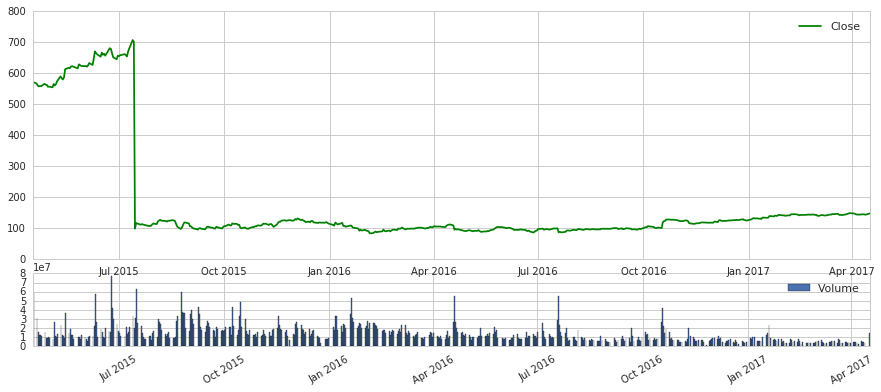

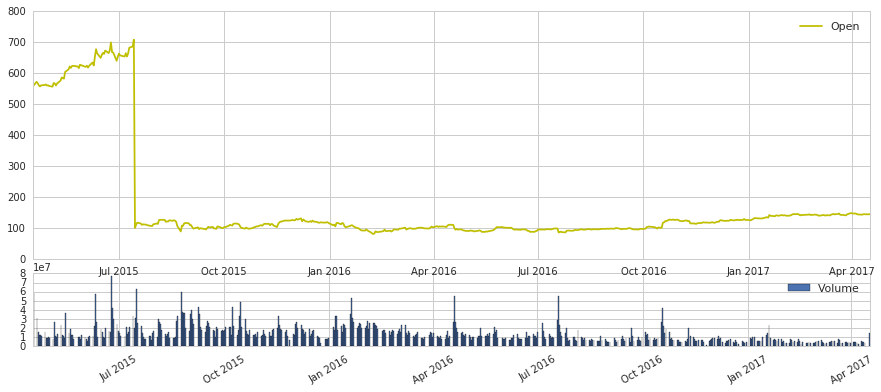

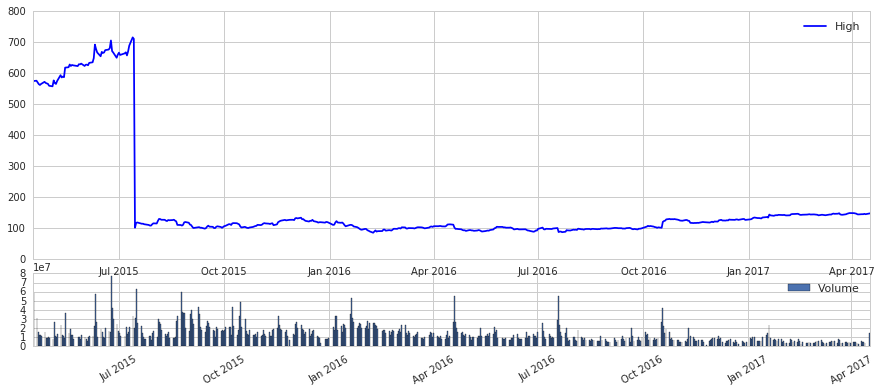

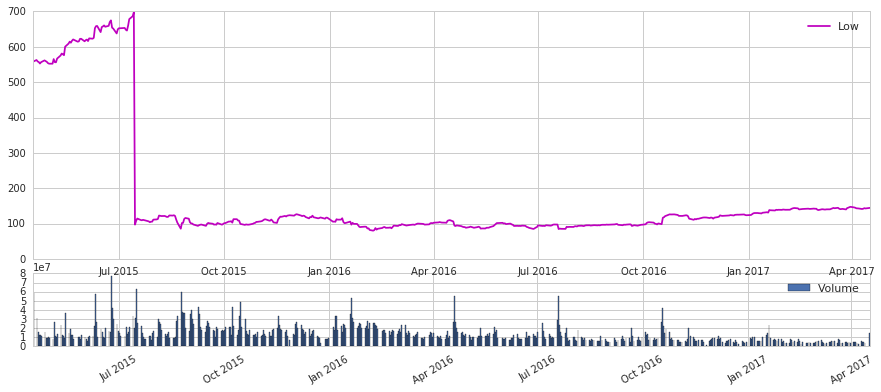

In [12]:
plot_prices(raw_df, "Close", "-g")
plot_prices(raw_df, "Open", "-y")
plot_prices(raw_df, "High", "-b")
plot_prices(raw_df, "Low", "-m")

In [13]:
def plot_deltas(raw_df, baseline_X, baseline_y, column_name="Close", formatmask="-g"):
    if raw_df is None:
        raw_df, sma_df, boll_df = load_dataframes(ticker, limit)

    # get our x ticks
    x = raw_df.index.tolist()

    # setup figure
    fig = plt.figure(figsize=(15, 8))
    grid = plt.GridSpec(5, 4, hspace=0.2, wspace=0.2)

    delta_ax = fig.add_subplot(grid[0, :])
    main_ax = fig.add_subplot(grid[1:3, :], sharex=delta_ax)
    volume_hist = fig.add_subplot(grid[3,:], sharex=delta_ax)
    cumdelta_ax = fig.add_subplot(grid[4,:], sharex=delta_ax)
    
    delta = None
    if column_name == "Close":
        delta = baseline_y["timewindow_return_1_Close"]
    else:
        delta = baseline_X["timewindow_return_1_{}".format(column_name)]

    
    delta_ax.plot(x, delta, "-k", label="1D return", linewidth=0.3)
    
    #Main Plot
    main_ax.plot(x, raw_df[column_name], formatmask, label=column_name)

    #Volume Plot
    volume_hist.bar(x, raw_df["Volume"], label="Volume")
    
    cumdelta_ax.plot(x, delta.cumsum(), "-b", label="Cum. return")

    #setting legends
    main_ax.legend(prop={'size':11})
    volume_hist.legend(prop={'size':11})
    delta_ax.legend(prop={'size':11})
    cumdelta_ax.legend(prop={'size':11})
    


    plt.show()


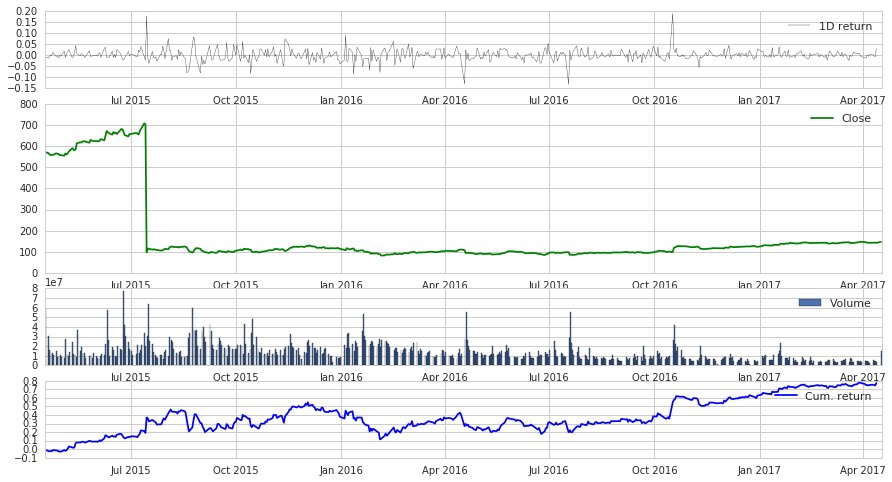

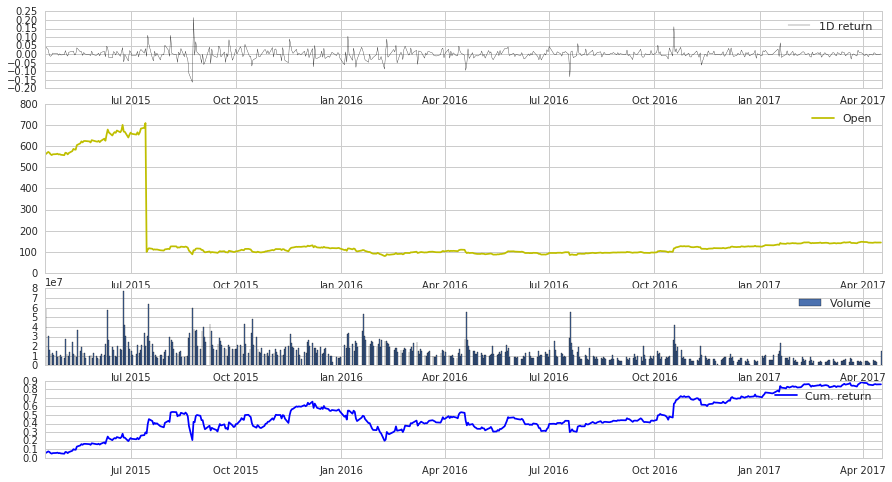

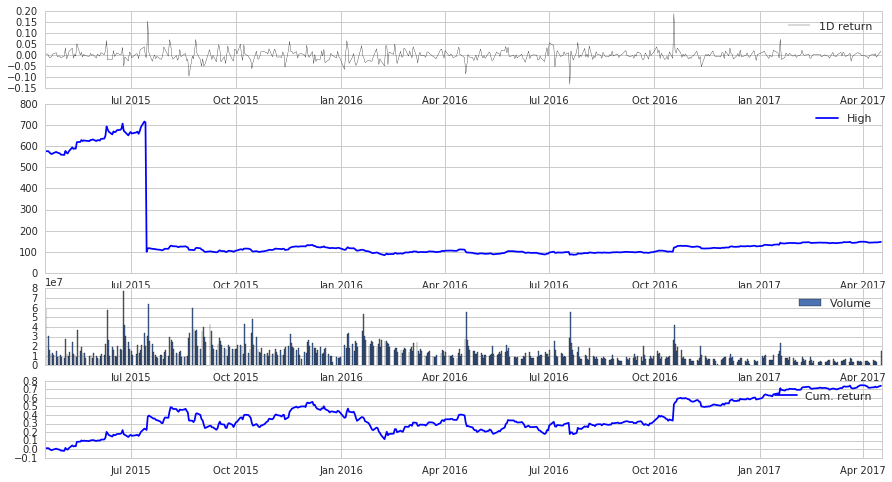

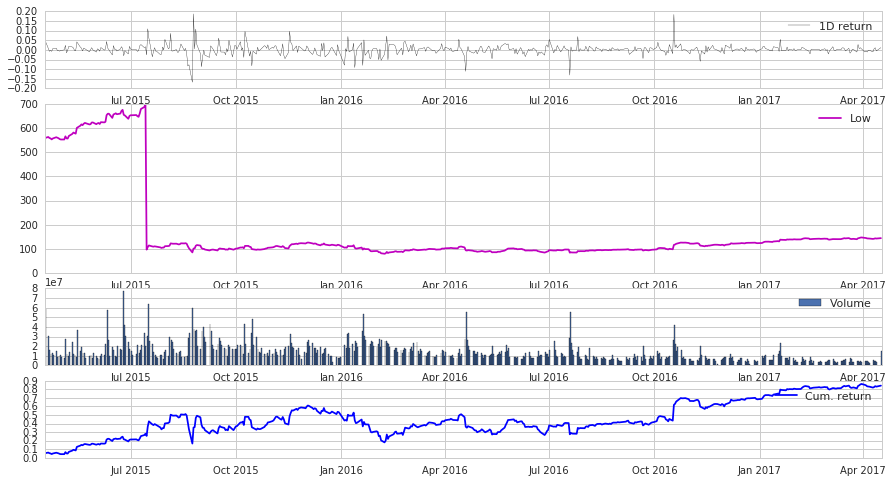

In [14]:
plot_deltas(raw_df, baseline_X, baseline_y, "Close", "-g")
plot_deltas(raw_df, baseline_X, baseline_y, "Open", "-y")
plot_deltas(raw_df, baseline_X, baseline_y, "High", "-b")
plot_deltas(raw_df, baseline_X, baseline_y, "Low", "-m")

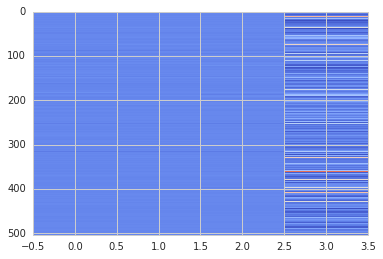

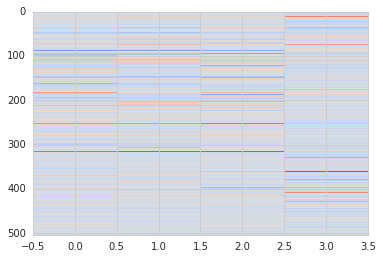

In [15]:
normbaseline_X = baseline_X / baseline_X.max()

plt.imshow(baseline_X.values, aspect='auto', interpolation='nearest', cmap="coolwarm")
plt.show()
plt.imshow(normbaseline_X.values, aspect='auto', interpolation='nearest', cmap="coolwarm")
plt.show()